In [ ]:
pip install bertopic


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 17.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.4 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039181 sha256=1d1b006db231eb0665e6120b8dfddfe073a70210c4765ef9a6555836d023c8fe
  Stored in di

In [ ]:
import pandas as pd
import numpy as np
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


from gensim import corpora, models

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("tm copy final.csv")

In [ ]:
df

,University,Guidelines
0,Harvard,Dear Members of the Harvard Community We write...
1,Yale,Publicly available generative Artificial Intel...
2,northwestern,Generative AI is evolving quickly as is instit...
3,Stanford,The Board on Conduct Affairs (BCA) has been as...
4,UCB,Guidance on using Generative AI tools Viewable...
...,...,...
70,Rutgers University,"""While machine learning tools that train d..."
71,Indiana University Bloomington,"""Since 2020 there has been an exponential in..."
72,University of Kansas,"""The University of Kansas does not have a sp..."
73,University of Tennessee Knoxville,"""When using AI tools it is important to be ..."


In [ ]:
def preprocess_text(text):
  pattern = r'[^a-zA-Z0-9\s]'
  cleaned_text = re.sub(pattern, '', text)

  tokens = word_tokenize(cleaned_text.lower())
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [word for word in tokens if word not in stop_words]
  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
  return lemmatized_tokens

In [ ]:
df["word_tokens"] = df['Guidelines'].apply(lambda x: preprocess_text(x))

In [ ]:
df.head()

,University,Guidelines,word_tokens
0,Harvard,Dear Members of the Harvard Community We write...,"[dear, member, harvard, community, write, toda..."
1,Yale,Publicly available generative Artificial Intel...,"[publicly, available, generative, artificial, ..."
2,northwestern,Generative AI is evolving quickly as is instit...,"[generative, ai, evolving, quickly, institutio..."
3,Stanford,The Board on Conduct Affairs (BCA) has been as...,"[board, conduct, affair, bca, asked, address, ..."
4,UCB,Guidance on using Generative AI tools Viewable...,"[guidance, using, generative, ai, tool, viewab..."


In [ ]:
def specific_topics(tokens_list):

    dictionary = corpora.Dictionary(tokens_list)


    corpus = [dictionary.doc2bow(tokens) for tokens in tokens_list]


    num_topics = 10
    passes = 15


    lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=passes)


    topics = lda_model.print_topics(num_words=10)  # Adjust num_words as needed
    for topic_id, topic_distribution in enumerate(topics):
      top_words = lda_model.show_topic(topic_id, topn=10)

    return (f"Topics {top_words}")



In [ ]:
df['topics'] = df['word_tokens'].apply(lambda x: specific_topics([x]))

In [ ]:
print(df['topics'])

0     Topics [('ai', 0.006048922), ('tool', 0.006036...
1     Topics [('ai', 0.0066239093), ('tool', 0.00661...
2     Topics [('ai', 0.0037273923), ('data', 0.00369...
3     Topics [('novel', 0.00990099), ('objective', 0...
4     Topics [('ai', 0.0036168778), ('tool', 0.00361...
                            ...                        
70    Topics [('ai', 0.0041840826), ('tool', 0.00411...
71    Topics [('ai', 0.0039746277), ('data', 0.00397...
72    Topics [('ai', 0.0021453968), ('student', 0.00...
73    Topics [('portion', 0.009523809), ('private', ...
74    Topics [('ai', 0.0028699108), ('use', 0.002854...
Name: topics, Length: 75, dtype: object


In [ ]:
datas = [i for i in df['Guidelines']]


In [ ]:
from bertopic import BERTopic
topic_model = BERTopic(embedding_model = 'all-MiniLM-L6-v2')


topics, probabilities = topic_model.fit_transform(datas)
# topic_model = BERTopic.load('arxiv-bertopic')


In [ ]:
topic_model.get_topic_freq()


,Topic,Count
2,0,38
0,1,19
1,-1,18


In [ ]:
topic_model.get_topic(topic = 0)

[('ai', 0.09552040079473438),
 ('student', 0.08378166099215895),
 ('tool', 0.06488678764751865),
 ('use', 0.06360136357300608),
 ('generative', 0.05264966070276564),
 ('instructor', 0.036019714551939995),
 ('course', 0.03583513319558122),
 ('work', 0.035554500335289375),
 ('learning', 0.03216782480139805),
 ('academic', 0.031400020036503835)]

In [ ]:
topic_model.get_topic(topic = 1)

[('ai', 0.09810570151752658),
 ('data', 0.09287643979221015),
 ('generative', 0.08578491868369427),
 ('tool', 0.08347720396930737),
 ('information', 0.07297274297302253),
 ('use', 0.056705716650430234),
 ('university', 0.051682783301606625),
 ('policy', 0.04777297145727223),
 ('using', 0.035979497417743915),
 ('may', 0.03391289496279157)]

In [ ]:
topic_model.get_topic(topic = -1)

[('ai', 0.08942104031785814),
 ('tool', 0.06097265392070036),
 ('chatgpt', 0.05205412181675351),
 ('data', 0.04198866283373851),
 ('use', 0.04081382042949033),
 ('information', 0.0389853860665369),
 ('generative', 0.038763478292754054),
 ('genai', 0.03460218037441281),
 ('model', 0.032204616525746334),
 ('student', 0.02796719155315227)]

In [ ]:
ethics_keywords = ['ethic', 'moral', 'responsible use', 'ethical guidelines']

def focuses_on_ethics(document):
    return any(keyword in document for keyword in ethics_keywords)

df['ethics'] = df['word_tokens'].apply(lambda x: focuses_on_ethics(x))
df[df['ethics']==True].iloc[:,0]

13                               Duke University
18                                   ETH Zurich 
21            California Institute Of Technology
33              The Geroge Washington University
37                      University of Pittsburgh
38                University of Colorado Boulder
39    University of Illinois at Urbana-Champaign
40          University of Maryland  College Park
43                        University of Arizona 
44                     Michigan State University
47                        University of Michigan
60       University of California  Santa Barbara
66                           Emory University   
68                         Texas A&M University 
72                          University of Kansas
74            Illinois Institute of Technology  
Name: University , dtype: object

In [ ]:
security_keywords = ['privacy', 'data protection', 'security', 'confidentiality', 'sensitive']

def focuses_on_security(document):
    return any(keyword in document for keyword in security_keywords)

df['security'] = df['word_tokens'].apply(lambda x: focuses_on_security(x))
df[df['security']==True].iloc[:,[0,-1]]

,University,security
0,Harvard,True
1,Yale,True
2,northwestern,True
4,UCB,True
6,UT Austin,True
7,Cornell University,True
10,Brown University,True
13,Duke University,True
14,Vanderbilt,True
15,CMU,True


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

In [ ]:
df['Guidelines'] = df['Guidelines'].apply(lambda x: clean_text(x))

In [ ]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Guidelines'])

In [ ]:
from gensim.models import Word2Vec


word2vec_model = Word2Vec(df['Guidelines'], vector_size=100, window=5, min_count=2, workers=4)

def document_vector(doc):
    doc = [word for word in doc if word in word2vec_model.wv.index_to_key]
    return np.mean(word2vec_model.wv[doc], axis=0)

doc_vectors = np.array([document_vector(doc) for doc in df['Guidelines']])



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

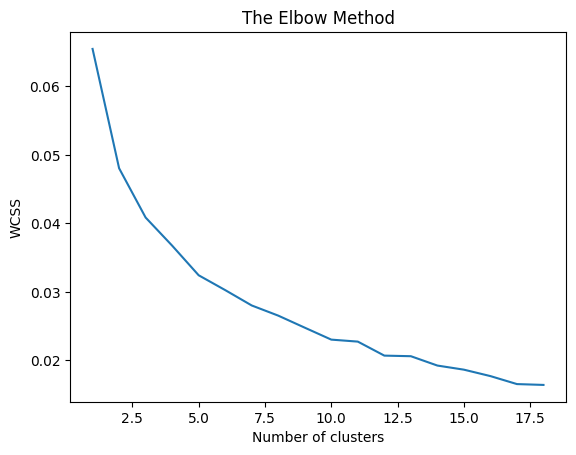

In [ ]:
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 19):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(doc_vectors)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, 19), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [ ]:
n_clusters = 5  # Example number of clusters
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(doc_vectors)

In [ ]:
y_kmeans

array([2, 4, 4, 3, 4, 3, 4, 4, 1, 0, 4, 1, 3, 4, 4, 2, 1, 3, 2, 4, 1, 4,
       3, 4, 3, 2, 1, 2, 3, 1, 0, 4, 1, 1, 3, 1, 1, 1, 0, 0, 2, 2, 3, 1,
       1, 1, 2, 0, 4, 4, 4, 2, 2, 0, 3, 3, 3, 4, 4, 0, 3, 2, 2, 3, 3, 4,
       2, 4, 4, 4, 3, 1, 4, 1, 4], dtype=int32)

In [ ]:
#remember to use word embedding


df['Cluster'] = y_kmeans

# Analyze clusters
for i in range(n_clusters):
    print(f"Cluster {i}:")
    print(df[df['Cluster'] == i]['Guidelines'])

Cluster 0:
9     recent release powerful generative ai tool uns...
30    generative artificial intelligence ai tool lik...
38    ai ethic higher education casey fiesler associ...
39    march 21 google announced begin slow roll chat...
47    university michigan genai offering rise numero...
53    looking responsible way setting boundary aroun...
59    response emerging field artificial intelligenc...
Name: Guidelines, dtype: object
Cluster 1:
8     generative ai policy generative ai tool write ...
11    teaching chatgpt generative ai powerful artifi...
16    response rapidly evolving landscape generative...
20    student use generative ai availability generat...
26    guideline use generative artificial intelligen...
29    student need know generative ai student enteri...
32    may hearing array opinion implication generati...
33    guideline using generative artificial intellig...
35    nyu private generative ai service pilot nyu co...
36    instructor committee developed following set

In [ ]:
for i in df[df['Cluster'] == 0]['Guidelines']:
  print(i)

dear member harvard community write today initial guideline use procurement generative artificial intelligence ai tool openai chatgpt google bard university support responsible experimentation generative ai tool important consideration keep mind using tool including information security data privacy compliance copyright academic integrity generative ai rapidly evolving technology university continue monitor development incorporate feedback harvard community update guideline accordingly initial guideline use generative ai tool protect confidential data enter data classified confidential level 2 including non public research data publicly available generative ai tool accordance university information security policy information shared generative ai tool using default setting private could expose proprietary sensitive information unauthorized party responsible content produce publish includes ai generated material ai generated content inaccurate misleading entirely fabricated sometimes ca

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

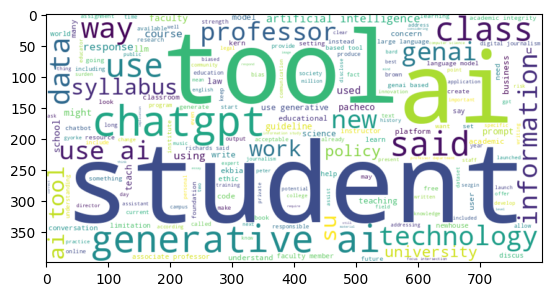

In [ ]:
# for cluster in range(0,5):
docs = df[df['Cluster'] == 0]['Guidelines']
text = ' '.join(docs)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud,interpolation='bilinear')

In [ ]:
df[df['Cluster'] == 0].iloc[:,0]

9                     University of Pennsylvania
30                           University of Miami
38                University of Colorado Boulder
39    University of Illinois at Urbana-Champaign
47                        University of Michigan
53                             Boston University
59                         Syracuse University  
Name: University , dtype: object

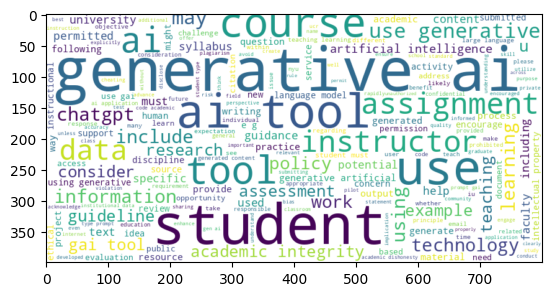

In [ ]:
docs = df[df['Cluster'] == 1]['Guidelines']
text = ' '.join(docs)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud,interpolation='bilinear')

In [ ]:
df[df['Cluster'] == 1].iloc[:,0]

8                             Columbia University
11                             Dartmouth College 
16                          University of Toronto
20                                  Johns Hopkins
26            University of California  Riverside
29                       University of Cincinnati
32                                  Virginia Tech
33               The Geroge Washington University
35                            New York University
36    University of North Carolina at Chapel Hill
37                       University of Pittsburgh
43                         University of Arizona 
44                      Michigan State University
45                          University of Florida
71                Indiana University Bloomington 
73            University of Tennessee  Knoxville 
Name: University , dtype: object

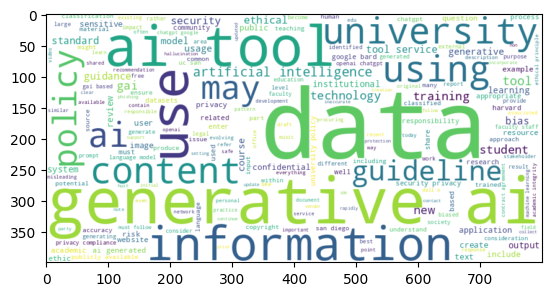

In [ ]:
docs = df[df['Cluster'] == 2]['Guidelines']
text = ' '.join(docs)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud,interpolation='bilinear')

In [ ]:
df[df['Cluster'] == 2].iloc[:,0]

0                                  Harvard
15                                     CMU
18                             ETH Zurich 
25                                     ASU
27                      University of Iowa
40    University of Maryland  College Park
41          University of California Davis
46                       Howard University
51        University of Wisconsin–Madison 
52                  Boise State University
61               The University of Chicago
62    University of California  San Diego 
66                     Emory University   
Name: University , dtype: object

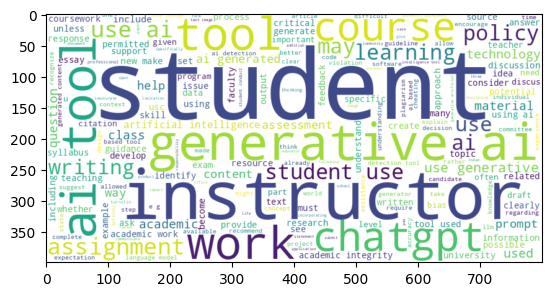

In [ ]:
docs = df[df['Cluster'] == 3]['Guidelines']
text = ' '.join(docs)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud,interpolation='bilinear')

In [ ]:
df[df['Cluster'] == 3].iloc[:,0]

3                                    Stanford
5                                        USC 
12                       Princeton University
17                   University of Cambridge 
22                   University of Washington
24                               Umass Boston
28                    Northeastern University
34                 University at Buffalo SUNY
42       University of California  Santa Cruz
54                          Temple University
55                          Balyor University
56                         Drexel University 
60    University of California  Santa Barbara
63       University of Minnesota  Twin Cities
64                     Ohio State University 
70                         Rutgers University
Name: University , dtype: object

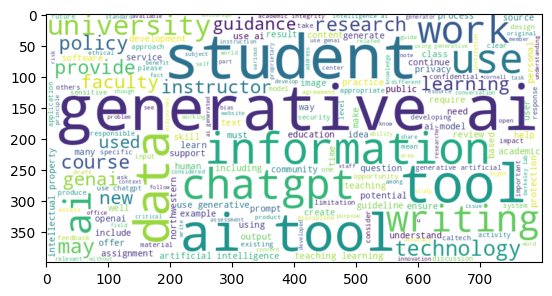

In [ ]:
docs = df[df['Cluster'] == 4]['Guidelines']
text = ' '.join(docs)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud,interpolation='bilinear')

In [ ]:
df[df['Cluster'] == 4].iloc[:,0]

1                                        Yale
2                                northwestern
4                                         UCB
6                                  UT Austin 
7                         Cornell University 
10                           Brown University
13                            Duke University
14                                Vanderbilt 
19    University of California  Irvine (UCI) 
21         California Institute Of Technology
23            Case Western Reserve University
31                   University of notre dame
48                 The University of Alabama 
49                     University of Tübingen
50                           Tufts University
57                     University of Houston 
58               Thomas Jefferson University 
65              Pennsylvania State University
67                          Purdue University
68                      Texas A&M University 
69                           Rice University 
72                       Universit

In [ ]:
from transformers import pipeline

# Load pre-trained sentiment analysis model
sentiment_pipeline = pipeline('sentiment-analysis')

def chunk_text(text, chunk_size=100):
    """
    Divide text into manageable chunks each containing approximately chunk_size words.

    :param text: The original text.
    :param chunk_size: Desired word count per chunk.
    :return: List of text chunks.
    """
    words = text.split()
    return [' '.join(words[i:i+chunk_size]) for i in range(0, len(words), chunk_size)]

def analyze_large_text_sentiment(text, chunk_size=256):
    """
    Analyze sentiment of large text by breaking it into smaller chunks.

    :param text: Large text to analyze.
    :param chunk_size: Number of words in each text chunk.
    :return: Overall sentiment of the text.
    """
    chunks = chunk_text(text, chunk_size)

    # Analyze sentiment of each chunk
    sentiments = [sentiment_pipeline(chunk)[0]['label'] for chunk in chunks]

    # Aggregate sentiments
    overall_sentiment = max(set(sentiments), key=sentiments.count)
    return overall_sentiment

In [ ]:
df['ai_stance'] = df['Guidelines'].apply(lambda x: analyze_large_text_sentiment(x))
df['ai_stance']

0     NEGATIVE
1     POSITIVE
2     NEGATIVE
3     NEGATIVE
4     NEGATIVE
        ...   
70    POSITIVE
71    NEGATIVE
72    NEGATIVE
73    NEGATIVE
74    NEGATIVE
Name: ai_stance, Length: 75, dtype: object

In [ ]:
df[df['ai_stance']=='POSITIVE'].iloc[:,[0,-1]]

,University,ai_stance
1,Yale,POSITIVE
7,Cornell University,POSITIVE
11,Dartmouth College,POSITIVE
19,University of California Irvine (UCI),POSITIVE
20,Johns Hopkins,POSITIVE
41,University of California Davis,POSITIVE
44,Michigan State University,POSITIVE
46,Howard University,POSITIVE
49,University of Tübingen,POSITIVE
62,University of California San Diego,POSITIVE


In [ ]:
df[df['ai_stance']=='NEGATIVE'].iloc[:,[0,-1]]

,University,ai_stance
0,Harvard,NEGATIVE
2,northwestern,NEGATIVE
3,Stanford,NEGATIVE
4,UCB,NEGATIVE
5,USC,NEGATIVE
...,...,...
68,Texas A&M University,NEGATIVE
71,Indiana University Bloomington,NEGATIVE
72,University of Kansas,NEGATIVE
73,University of Tennessee Knoxville,NEGATIVE
